In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cash = pd.read_csv("/Users/anastasiatkaceva/Desktop/IronHack2024/LABs/lab_9/project_dataset/cash_request.csv")

In [5]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [6]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reimbursement_date']=pd.to_datetime(cash['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reco_last_update']=pd.to_datetime(cash['reco_last_update'])
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'])
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'])
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['send_at'] = pd.to_datetime(cash['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [7]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                123 non-null    datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          20920 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             4503 non-null   datetime64[ns,

In [8]:
cash.duplicated().sum()

0

In [9]:
numero_nulos = cash['user_id'].isna().sum()
numero_nulos

2103

In [10]:
deleted_accounts  = cash[cash['deleted_account_id'] == 6334.0 ]
deleted_accounts.sample(5)



,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7102,12056,100.0,rejected,2020-08-11 18:16:02.455746+00:00,2020-08-12 09:29:48.374668+00:00,NaN,NaT,6334.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
16556,6954,50.0,money_back,2020-07-07 17:16:22.061787+00:00,2020-12-18 13:10:57.166245+00:00,NaN,NaT,6334.0,2020-08-05 22:00:00+00:00,2020-07-10,2020-08-05 22:00:00+00:00,regular,NaT,NaN,NaT,NaT
6708,11931,100.0,rejected,2020-08-11 10:22:21.001039+00:00,2020-08-11 10:30:10.695923+00:00,NaN,NaT,6334.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
16551,5566,50.0,money_back,2020-06-27 07:53:38.762262+00:00,2020-12-18 13:10:57.095071+00:00,NaN,NaT,6334.0,2020-07-05 22:00:00+00:00,2020-06-30,NaT,regular,NaT,NaN,NaT,NaT
6709,11947,100.0,rejected,2020-08-11 11:24:28.822363+00:00,2020-08-11 15:12:01.626289+00:00,NaN,NaT,6334.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [11]:
rejected = cash[cash['status'] =="rejected"]
rejected.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
3174,9300,100.0,rejected,2020-07-21 17:49:59.826485+00:00,2020-07-22 09:06:54.007722+00:00,2142.0,NaT,NaN,2020-08-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
7374,17629,100.0,rejected,2020-09-24 10:26:39.578982+00:00,2020-09-24 11:24:09.833818+00:00,24997.0,NaT,NaN,NaT,NaT,NaT,instant,NaT,NaN,NaT,NaT
7508,14571,50.0,rejected,2020-09-04 18:22:46.331991+00:00,2020-09-05 07:05:14.015974+00:00,NaN,NaT,7142.0,2020-10-02 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
4086,9965,100.0,rejected,2020-07-29 09:01:40.924529+00:00,2020-07-29 10:12:58.701558+00:00,NaN,NaT,3608.0,2020-08-14 22:00:00+00:00,NaT,NaT,instant,NaT,NaN,NaT,NaT
3408,10045,100.0,rejected,2020-07-29 16:52:26.083349+00:00,2020-07-29 18:23:20.829962+00:00,6315.0,NaT,NaN,2020-08-06 22:00:00+00:00,NaT,NaT,instant,NaT,NaN,NaT,NaT
3148,10943,50.0,rejected,2020-08-05 09:34:57.466705+00:00,2020-08-05 13:47:03.632105+00:00,19217.0,NaT,NaN,NaT,NaT,NaT,instant,NaT,NaN,NaT,NaT
4516,10336,50.0,rejected,2020-07-31 18:04:03.823148+00:00,2020-08-01 13:11:23.865398+00:00,27199.0,NaT,NaN,2020-09-07 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
2342,4286,100.0,rejected,2020-06-19 20:23:03.099057+00:00,2020-06-20 14:04:38.024505+00:00,NaN,NaT,2109.0,2020-07-15 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
7110,17162,100.0,rejected,2020-09-22 01:39:30.410316+00:00,2020-09-22 08:31:35.237946+00:00,NaN,NaT,6334.0,NaT,NaT,NaT,instant,NaT,NaN,NaT,NaT
3515,8407,100.0,rejected,2020-07-16 07:17:10.786724+00:00,2020-07-17 10:47:11.985370+00:00,25332.0,NaT,NaN,2020-08-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [12]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6568 entries, 0 to 10532
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          6568 non-null   int64              
 1   amount                      6568 non-null   float64            
 2   status                      6568 non-null   object             
 3   created_at                  6568 non-null   datetime64[ns, UTC]
 4   updated_at                  6568 non-null   datetime64[ns, UTC]
 5   user_id                     5221 non-null   float64            
 6   moderated_at                4 non-null      datetime64[ns, UTC]
 7   deleted_account_id          1347 non-null   float64            
 8   reimbursement_date          5261 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  1 non-null      datetime64[ns]     
 10  money_back_date             0 non-null      datetime64[ns, UTC]


In [13]:
cash['m_created_at'] = cash['created_at'].dt.month
cash['m_reimbursement'] = cash['reimbursement_date'].dt.month
cash.sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at,m_reimbursement
22022,26534,50.0,money_back,2020-10-30 22:10:29.739814+00:00,2020-12-18 13:13:15.320680+00:00,100857.0,NaT,NaN,2020-12-07 22:00:00+00:00,2020-11-03,NaT,instant,NaT,NaN,NaT,NaT,10,12.0
21672,26525,100.0,money_back,2020-10-30 21:04:31.813299+00:00,2020-12-18 13:13:02.162552+00:00,15742.0,NaT,NaN,2020-11-27 23:00:00+00:00,2020-11-03,NaT,instant,NaT,NaN,NaT,NaT,10,11.0
13573,11059,100.0,money_back,2020-08-06 06:20:29.044174+00:00,2020-12-18 13:09:50.799434+00:00,34008.0,NaT,NaN,2020-09-02 22:00:00+00:00,2020-08-07,2020-09-01 22:00:00+00:00,instant,NaT,NaN,NaT,NaT,8,9.0
8803,14848,50.0,direct_debit_rejected,2020-09-06 16:46:02.755299+00:00,2020-10-21 22:40:49.978353+00:00,9249.0,NaT,NaN,2020-10-10 23:51:00+00:00,2020-09-08,NaT,instant,NaT,pending,2020-10-21 22:40:46.227380+00:00,2020-10-21 22:40:49.987044+00:00,9,10.0
8813,23246,100.0,direct_debit_sent,2020-10-22 23:00:19.110507+00:00,2021-01-10 21:15:28.906988+00:00,7395.0,NaT,NaN,2021-02-09 23:00:00+00:00,2020-10-24,NaT,instant,NaT,NaN,NaT,NaT,10,2.0


<Axes: xlabel='m_created_at', ylabel='status'>

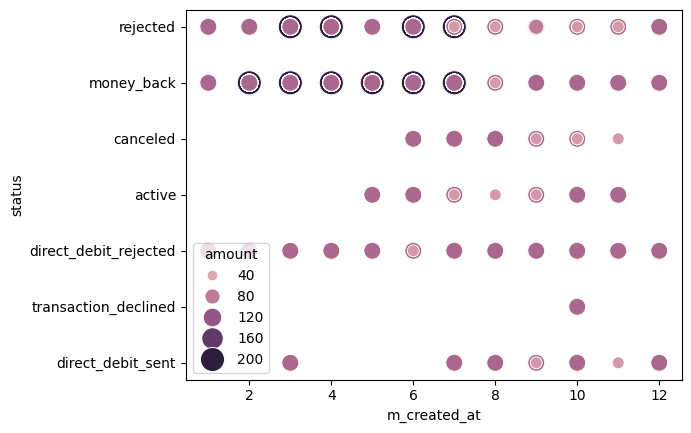

In [14]:
sns.scatterplot(x="m_created_at", y="status", hue="amount", data=cash, size='amount', sizes=(0, 300))

In [15]:
df_money_back = cash[cash['status'] == 'money_back']
df_money_back['tiempo_cierre_prestamo'] = df_money_back['reimbursement_date'] - df_money_back['created_at']

tiempo_promedio_cierre_meses = df_money_back['tiempo_cierre_prestamo'].mean().days 
tiempo_maximo_cierre_meses = df_money_back['tiempo_cierre_prestamo'].max().days 
tiempo_min_cierre_meses = df_money_back['tiempo_cierre_prestamo'].min().days 


# Imprimir el tiempo promedio de cierre del préstamo en meses
print("El tiempo promedio para cerrar el préstamo en el estado 'money_back' es aproximadamente:", tiempo_promedio_cierre_meses, "days")
print("El tiempo maximo para cerrar el préstamo en el estado 'money_back' es aproximadamente:", tiempo_maximo_cierre_meses, "days")
print("El tiempo min  para cerrar el préstamo en el estado 'money_back' es aproximadamente:", tiempo_min_cierre_meses, "days")

El tiempo promedio para cerrar el préstamo en el estado 'money_back' es aproximadamente: 26 days
El tiempo maximo para cerrar el préstamo en el estado 'money_back' es aproximadamente: 169 days
El tiempo min  para cerrar el préstamo en el estado 'money_back' es aproximadamente: -105 days


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_32341/3628428550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_money_back['tiempo_cierre_prestamo'] = df_money_back['reimbursement_date'] - df_money_back['created_at']


In [16]:
wierd = df_money_back[df_money_back['tiempo_cierre_prestamo'] <pd.Timedelta(days=0)]
wierd.info()
wierd.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 13689 to 13689
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          1 non-null      int64              
 1   amount                      1 non-null      float64            
 2   status                      1 non-null      object             
 3   created_at                  1 non-null      datetime64[ns, UTC]
 4   updated_at                  1 non-null      datetime64[ns, UTC]
 5   user_id                     1 non-null      float64            
 6   moderated_at                1 non-null      datetime64[ns, UTC]
 7   deleted_account_id          0 non-null      float64            
 8   reimbursement_date          1 non-null      datetime64[ns, UTC]
 9   cash_request_received_date  1 non-null      datetime64[ns]     
 10  money_back_date             0 non-null      datetime64[ns, UTC]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at,m_reimbursement,tiempo_cierre_prestamo
13689,8626,60.0,money_back,2020-07-17 10:37:54.852063+00:00,2020-12-18 13:09:54.184260+00:00,33881.0,2020-07-17 15:47:55+00:00,NaN,2020-04-03 22:00:00+00:00,2020-07-21,NaT,regular,NaT,NaN,NaT,NaT,7,4.0,-105 days +11:22:05.147937


In [17]:
df_money_back.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16397 entries, 5 to 23968
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          16397 non-null  int64              
 1   amount                      16397 non-null  float64            
 2   status                      16397 non-null  object             
 3   created_at                  16397 non-null  datetime64[ns, UTC]
 4   updated_at                  16397 non-null  datetime64[ns, UTC]
 5   user_id                     15683 non-null  float64            
 6   moderated_at                106 non-null    datetime64[ns, UTC]
 7   deleted_account_id          715 non-null    float64            
 8   reimbursement_date          14748 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  15408 non-null  datetime64[ns]     
 10  money_back_date             4297 non-null   datetime64[ns, UTC]

In [18]:
# Filtrar el DataFrame para excluir la fila con ID 8626
filtered_df = df_money_back[df_money_back['id'] != 8626]

# Calcular el valor mínimo de la columna deseada
min_value = filtered_df['tiempo_cierre_prestamo'].min()

print("El valor mínimo ignorando la fila con ID 8626 es:", min_value)

El valor mínimo ignorando la fila con ID 8626 es: 1 days 02:32:29.964603


In [19]:
# Step 2.1: Assign the cohort and calculate the cohort index
cash['transaction_month'] = cash['created_at'].dt.to_period('M')

cash['cohort_month'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')



/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_32341/3917570786.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['transaction_month'] = cash['created_at'].dt.to_period('M')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_32341/3917570786.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['cohort_month'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [20]:
# Step 2.2: Calculate the cohort index
#cash['cohort_index'] = (cash['transaction_month'] - cash['cohort_month']).dt.month
#cash['cohort_index'] = (cash['transaction_month'] - cash['cohort_month']).astype('int')
cash['cohort_index'] = (cash['transaction_month'].dt.year - cash['cohort_month'].dt.year) * 12 + (cash['transaction_month'].dt.month - cash['cohort_month'].dt.month)


In [21]:
# Step 2.3: Create a pivot table for cohort analysis
cohort_data = cash.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='user_id')



In [22]:
# Step 3: Calculate retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)



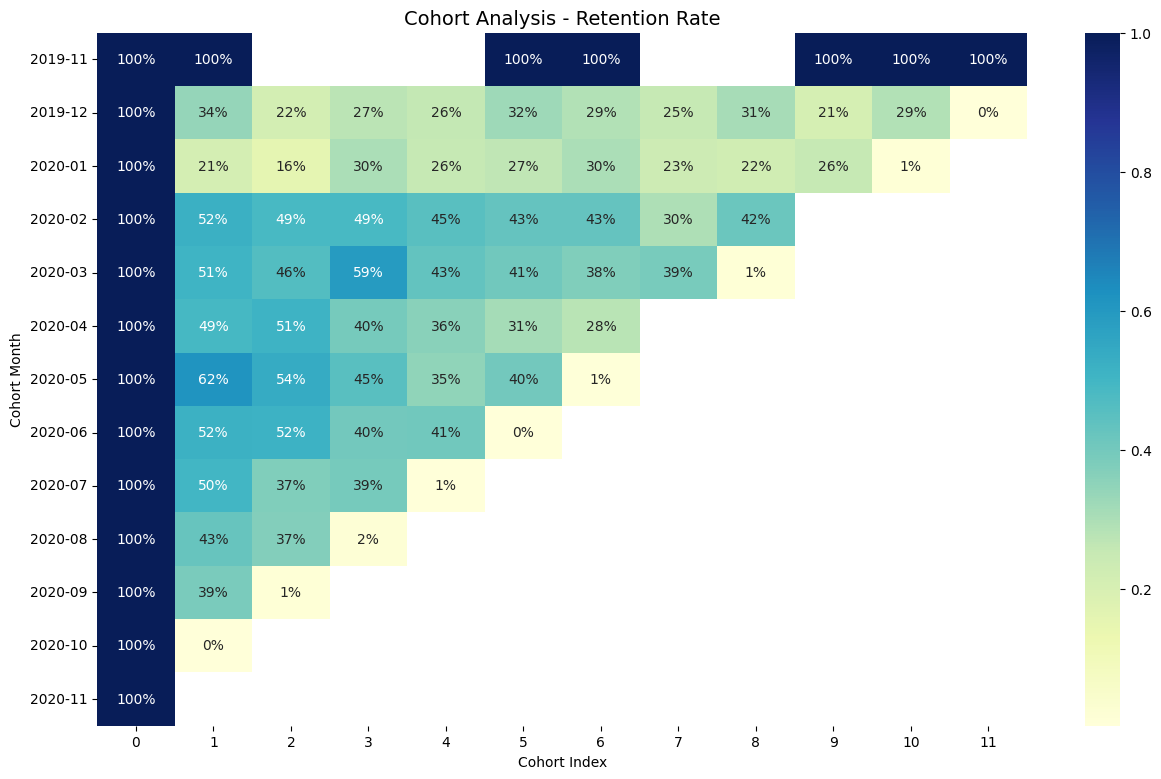

In [23]:
# Step 4: Visualize the retention rate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
plt.title('Cohort Analysis - Retention Rate', fontsize = 14)
sns.heatmap(retention, annot=True, fmt='.0%', cmap="YlGnBu")
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')

plt.show()


In [24]:

from datetime import datetime
#Following tutorial from youtube I will first create a subset only with the relevan data 
cash2 = cash[['user_id', 'created_at']].copy(deep=True)
cash2.head()

,user_id,created_at
0,804.0,2019-12-10 19:05:21.596873+00:00
1,231.0,2019-12-10 19:50:12.347780+00:00
2,191.0,2019-12-10 19:13:35.825460+00:00
3,761.0,2019-12-10 19:16:10.880172+00:00
4,7686.0,2020-05-06 09:59:38.877376+00:00


In [25]:
cash2['YM'] = cash2['created_at'].dt.to_period('M')
cash2

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_32341/2819372296.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash2['YM'] = cash2['created_at'].dt.to_period('M')


,user_id,created_at,YM
0,804.0,2019-12-10 19:05:21.596873+00:00,2019-12
1,231.0,2019-12-10 19:50:12.347780+00:00,2019-12
2,191.0,2019-12-10 19:13:35.825460+00:00,2019-12
3,761.0,2019-12-10 19:16:10.880172+00:00,2019-12
4,7686.0,2020-05-06 09:59:38.877376+00:00,2020-05
...,...,...,...
23965,13681.0,2020-10-12 13:54:11.686225+00:00,2020-10
23966,NaN,2020-10-27 14:41:25.734910+00:00,2020-10
23967,82122.0,2020-10-20 07:58:04.006937+00:00,2020-10
23968,64517.0,2020-10-10 05:40:55.700422+00:00,2020-10


In [26]:
start_month = cash2['YM'].min()
start_month

Period('2019-11', 'M')

In [27]:
cash2['index_month_cash_request'] = cash2['YM'].apply(lambda x: (x - start_month).n)
cash2

,user_id,created_at,YM,index_month_cash_request
0,804.0,2019-12-10 19:05:21.596873+00:00,2019-12,1
1,231.0,2019-12-10 19:50:12.347780+00:00,2019-12,1
2,191.0,2019-12-10 19:13:35.825460+00:00,2019-12,1
3,761.0,2019-12-10 19:16:10.880172+00:00,2019-12,1
4,7686.0,2020-05-06 09:59:38.877376+00:00,2020-05,6
...,...,...,...,...
23965,13681.0,2020-10-12 13:54:11.686225+00:00,2020-10,11
23966,NaN,2020-10-27 14:41:25.734910+00:00,2020-10,11
23967,82122.0,2020-10-20 07:58:04.006937+00:00,2020-10,11
23968,64517.0,2020-10-10 05:40:55.700422+00:00,2020-10,11


In [28]:
cash3 = cash2.groupby('user_id')['index_month_cash_request'].min().reset_index()
cash3= cash3.rename(columns={'index_month_cash_request':'cohort_month'})
cash3.sample(10)

,user_id,cohort_month
173,1206.0,2
2502,17890.0,7
1839,13344.0,8
1876,13621.0,8
1869,13572.0,11
1522,10991.0,6
1069,8104.0,7
2467,17667.0,7
8491,80019.0,11
1762,12695.0,10


In [29]:
cash4= cash2.join(cash3.set_index('user_id'), on = 'user_id')
cash4.sample(5)

,user_id,created_at,YM,index_month_cash_request,cohort_month
19675,43082.0,2020-10-16 10:56:13.980923+00:00,2020-10,11,10.0
18486,69047.0,2020-10-31 10:18:03.993558+00:00,2020-10,11,11.0
13460,12890.0,2020-07-15 18:16:49.037659+00:00,2020-07,8,7.0
12304,17936.0,2020-07-02 12:12:09.086566+00:00,2020-07,8,7.0
7272,45418.0,2020-09-23 09:38:49.884867+00:00,2020-09,10,10.0


In [30]:
cash4['cohort_index'] = cash4.index_month_cash_request - cash4.cohort_month
cash4.head()

,user_id,created_at,YM,index_month_cash_request,cohort_month,cohort_index
0,804.0,2019-12-10 19:05:21.596873+00:00,2019-12,1,1.0,0.0
1,231.0,2019-12-10 19:50:12.347780+00:00,2019-12,1,1.0,0.0
2,191.0,2019-12-10 19:13:35.825460+00:00,2019-12,1,1.0,0.0
3,761.0,2019-12-10 19:16:10.880172+00:00,2019-12,1,1.0,0.0
4,7686.0,2020-05-06 09:59:38.877376+00:00,2020-05,6,6.0,0.0


In [31]:
#Since we can have various CR requested by the same user in a month, we leave just 1st one
cash5 = cash4[['user_id', 'cohort_month', 'cohort_index']]
cash6= cash5.drop_duplicates(subset=['user_id', 'cohort_month', 'cohort_index'], keep='first')

In [32]:
cash7 = cash6.groupby(['cohort_month', 'cohort_index'])['user_id'].count().reset_index()
cash7 = cash7.rename(columns={'user_id':"costumer_count"})
cash7

,cohort_month,cohort_index,costumer_count
0,0.0,0.0,1
1,0.0,1.0,1
2,0.0,5.0,1
3,0.0,6.0,1
4,0.0,9.0,1
...,...,...,...
78,10.0,1.0,660
79,10.0,2.0,20
80,11.0,0.0,4694
81,11.0,1.0,15


In [33]:
cash8 = cash7.pivot_table(index='cohort_month', columns='cohort_index', values='costumer_count')
cash8
#so in month 0 only 1 joined and the same person returned to the platform in 1st month,5th,6th,9-11
#in month 1 204 people ask for CR, out of them 69 asked again in 1st month, 44 in a second...

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort_month,,,,,,,,,,,,
0.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0
1.0,204.0,69.0,44.0,56.0,53.0,66.0,59.0,52.0,63.0,42.0,59.0,1.0
2.0,90.0,19.0,14.0,27.0,23.0,24.0,27.0,21.0,20.0,23.0,1.0,NaN
3.0,84.0,44.0,41.0,41.0,38.0,36.0,36.0,25.0,35.0,NaN,NaN,NaN
4.0,69.0,35.0,32.0,41.0,30.0,28.0,26.0,27.0,1.0,NaN,NaN,NaN
5.0,212.0,104.0,108.0,84.0,76.0,66.0,59.0,NaN,NaN,NaN,NaN,NaN
6.0,369.0,227.0,198.0,167.0,128.0,148.0,3.0,NaN,NaN,NaN,NaN,NaN
7.0,1338.0,697.0,690.0,540.0,542.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,1294.0,646.0,484.0,511.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:

sorted_cash = cash.sort_values(by='created_at')
sorted_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at,m_reimbursement,transaction_month,cohort_month,cohort_index
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47.0,2019-11-20 12:16:50+00:00,NaN,2019-12-05 23:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,11,12.0,2019-11,2019-11,0
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,NaN,2019-12-09 14:58:28+00:00,1309.0,2019-12-16 23:00:00+00:00,NaT,...,regular,NaT,NaN,NaT,NaT,12,12.0,2019-12,NaT,24253
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,NaT,NaN,NaT,NaT,...,regular,NaT,NaN,NaT,NaT,12,NaN,2019-12,2019-12,0
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812.0,2019-12-11 09:40:33+00:00,NaN,2020-02-05 23:00:00+00:00,2019-12-11,...,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,12,2.0,2019-12,2019-12,0
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,NaT,NaN,NaT,NaT,...,regular,NaT,NaN,NaT,NaT,12,NaN,2019-12,2019-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916.0,NaT,NaN,2020-11-12 22:00:00+00:00,2020-11-02,...,instant,NaT,NaN,NaT,NaT,11,11.0,2020-11,2020-09,2
21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339.0,NaT,NaN,2020-11-29 11:00:00+00:00,2020-11-02,...,instant,NaT,NaN,NaT,NaT,11,11.0,2020-11,2020-09,2
7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505.0,NaT,NaN,2020-11-24 23:51:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,11,11.0,2020-11,2020-07,4
14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781.0,NaT,NaN,2020-12-04 11:00:00+00:00,NaT,...,instant,NaT,NaN,NaT,NaT,11,12.0,2020-11,2020-11,0


In [35]:
cash9 = cash8.divide(cash8.iloc[:,0], axis=0).round(3)*100
cash9

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
cohort_month,,,,,,,,,,,,
0.0,100.0,100.0,NaN,NaN,NaN,100.0,100.0,NaN,NaN,100.0,100.0,100.0
1.0,100.0,33.8,21.6,27.5,26.0,32.4,28.9,25.5,30.9,20.6,28.9,0.5
2.0,100.0,21.1,15.6,30.0,25.6,26.7,30.0,23.3,22.2,25.6,1.1,NaN
3.0,100.0,52.4,48.8,48.8,45.2,42.9,42.9,29.8,41.7,NaN,NaN,NaN
4.0,100.0,50.7,46.4,59.4,43.5,40.6,37.7,39.1,1.4,NaN,NaN,NaN
5.0,100.0,49.1,50.9,39.6,35.8,31.1,27.8,NaN,NaN,NaN,NaN,NaN
6.0,100.0,61.5,53.7,45.3,34.7,40.1,0.8,NaN,NaN,NaN,NaN,NaN
7.0,100.0,52.1,51.6,40.4,40.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN
8.0,100.0,49.9,37.4,39.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


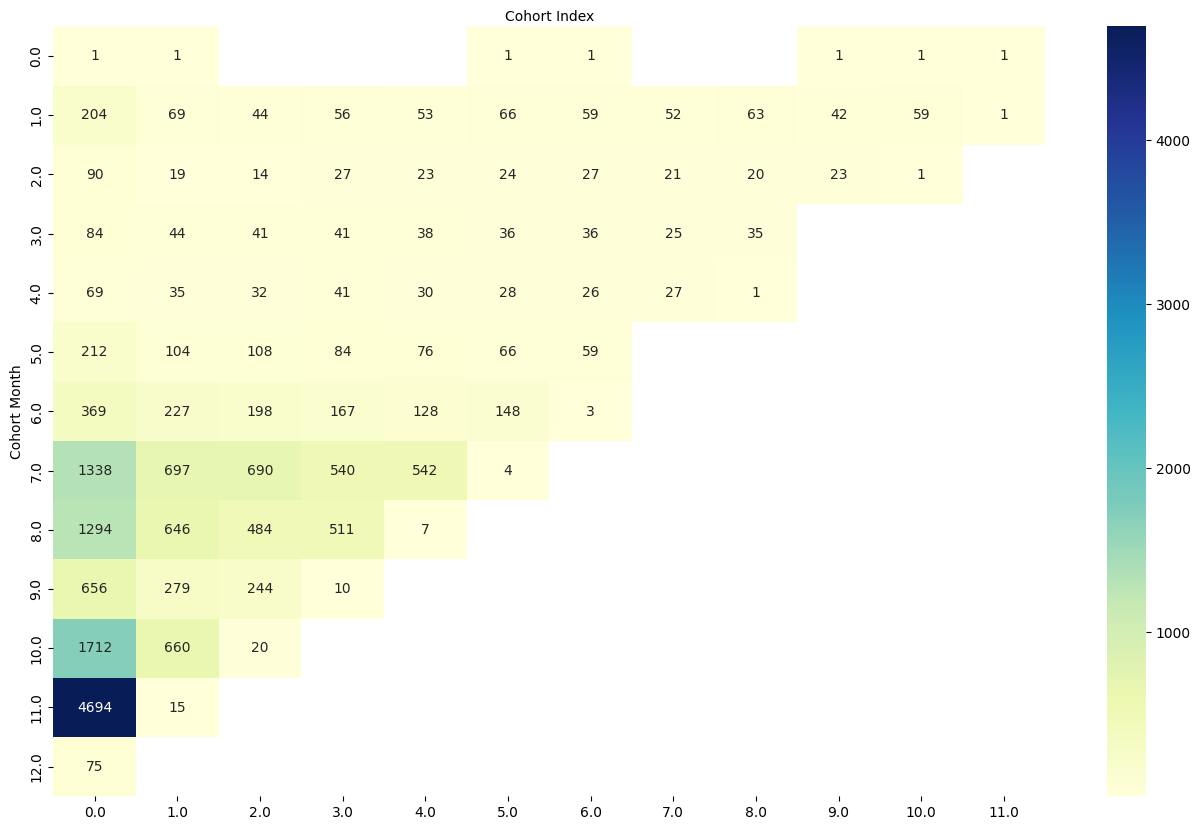

In [36]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(cash8, annot = True, cmap="YlGnBu", fmt = 'g')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Cohort Index')
ax.xaxis.set_label_position('top')
plt.show()

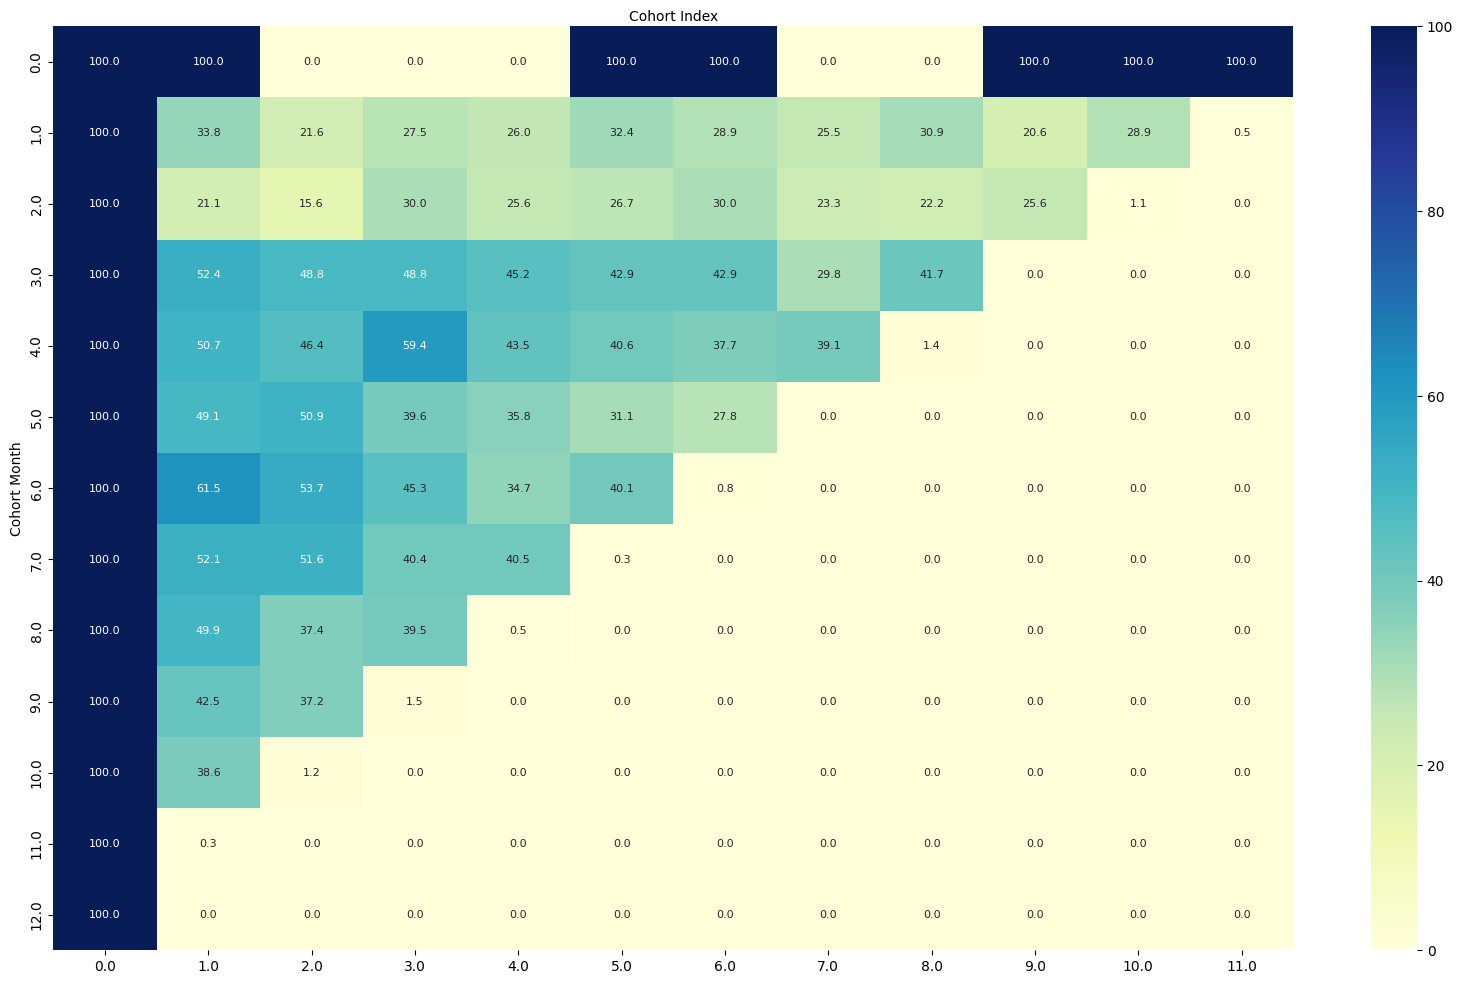

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))  # Aumentar el tamaño de la figura
sns.heatmap(cash9.fillna(0),  # Reemplazar NaN por 0
            annot=True,
            cmap="YlGnBu",
            fmt='.1f',  # Formato con una cifra decimal
            annot_kws={"size": 8})  # Ajustar el tamaño del texto de las anotaciones
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Cohort Index')
ax.xaxis.set_label_position('top')
plt.show()

BY WEEK

In [39]:
cash2['signup_week'] = cash2['created_at'].dt.to_period('W')

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_32341/3905295941.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash2['signup_week'] = cash2['created_at'].dt.to_period('W')


In [42]:
cohort_data = cash2.groupby('signup_week')['user_id'].nunique().reset_index()
cohort_data.columns = ['signup_week', 'cohort_size']


In [51]:
cash2['week_difference'] = cash2['created_at'].apply(lambda x: (x - cash2['created_at'].min()).days // 7)
retention_matrix = pd.crosstab(cash2['signup_week'], cash2['week_difference'])



In [52]:
retention_rate = retention_matrix.divide(cohort_data.set_index('signup_week')['cohort_size'], axis=0)


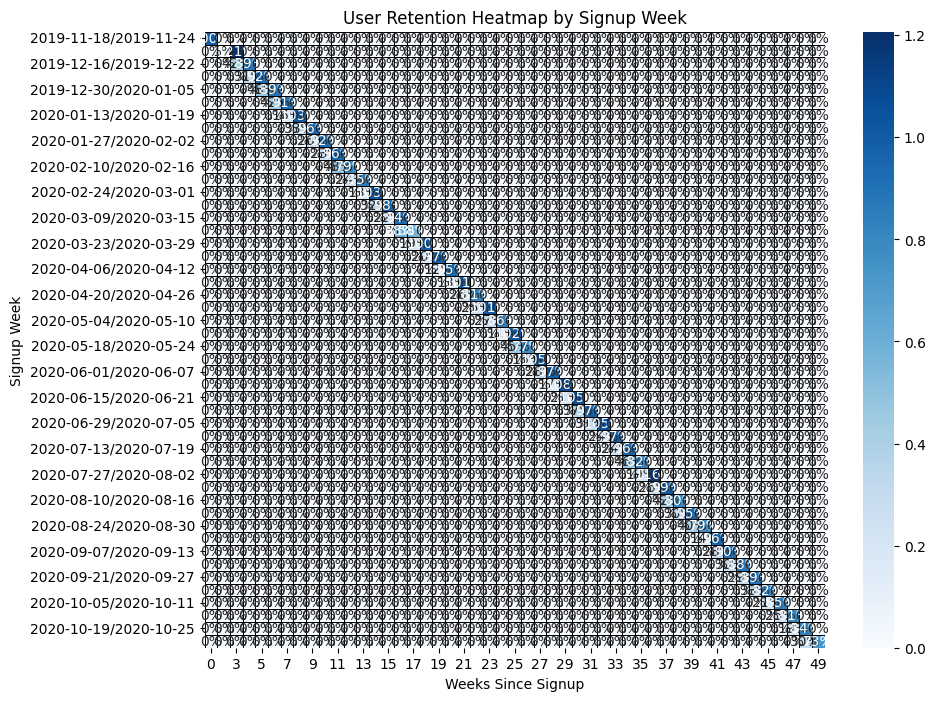

In [53]:
plt.figure(figsize=(10, 8))
plt.title('User Retention Heatmap by Signup Week')
sns.heatmap(retention_rate, annot=True, fmt=".0%", cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Weeks Since Signup')
plt.ylabel('Signup Week')
plt.show()